In [1]:
import sys
sys.path.insert(0,"/home/yunye/gwaslab/gwaslab/src")
import gwaslab as gl

# Load sumstats

In [2]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             n="N",nrows=10000)

Wed Jun 14 21:06:35 2023 GWASLab version 3.4.14 https://cloufield.github.io/gwaslab/
Wed Jun 14 21:06:35 2023 (C) 2022-2023, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
Wed Jun 14 21:06:35 2023 Start to initiate from file :t2d_bbj.txt.gz
Wed Jun 14 21:06:35 2023  -Reading columns          : Frq,CHR,SE,POS,P,REF,SNP,N,Dir,BETA,ALT
Wed Jun 14 21:06:35 2023  -Renaming columns to      : EAF,CHR,SE,POS,P,NEA,SNPID,N,DIRECTION,BETA,EA
Wed Jun 14 21:06:35 2023  -Current Dataframe shape : 10000  x  11
Wed Jun 14 21:06:35 2023  -Initiating a status column: STATUS ...
Wed Jun 14 21:06:35 2023  -NEAF is specified...
Wed Jun 14 21:06:35 2023  -Checking if 0<= NEAF <=1 ...
Wed Jun 14 21:06:35 2023  -Converted NEAF to EAF.
Wed Jun 14 21:06:35 2023  -Removed 0 variants with bad NEAF.
Wed Jun 14 21:06:35 2023 Start to reorder the columns...
Wed Jun 14 21:06:35 2023  -Current Dataframe shape : 10000  x  12
Wed Jun 14 21:06:35 2023  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE

In [3]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.59700,166718,-?+-,9999999
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.59730,166718,+?-+,9999999
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.69080,166718,+?-+,9999999
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.28460,166718,-?++,9999999
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.27050,166718,-?++,9999999
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1:3142135_T_C,1,3142135,C,T,0.1292,-0.0350,0.0191,0.06686,191764,----,9999999
9996,1:3142137_T_C,1,3142137,C,T,0.4886,-0.0014,0.0094,0.88070,191764,-0+-,9999999
9997,1:3142161_C_T,1,3142161,C,T,0.9476,-0.0061,0.0216,0.77790,191764,---+,9999999
9998,1:3142212_C_CT,1,3142212,C,CT,0.9418,-0.0047,0.0199,0.81500,191764,---+,9999999


# Harmonize

In [4]:
mysumstats.harmonize(basic_check = True, 
                     ref_seq=gl.get_path("ucsc_genome_hg19"))

Wed Jun 14 21:06:35 2023 Start to check IDs...
Wed Jun 14 21:06:35 2023  -Current Dataframe shape : 10000  x  12
Wed Jun 14 21:06:35 2023  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Wed Jun 14 21:06:36 2023 Finished checking IDs successfully!
Wed Jun 14 21:06:36 2023 Start to fix chromosome notation...
Wed Jun 14 21:06:36 2023  -Current Dataframe shape : 10000  x  12
Wed Jun 14 21:06:36 2023  -Checking CHR data type...
Wed Jun 14 21:06:36 2023  -Vairants with standardized chromosome notation: 10000
Wed Jun 14 21:06:36 2023  -All CHR are already fixed...
Wed Jun 14 21:06:36 2023 Finished fixing chromosome notation successfully!
Wed Jun 14 21:06:36 2023 Start to fix basepair positions...
Wed Jun 14 21:06:36 2023  -Current Dataframe shape : 10000  x  12
Wed Jun 14 21:06:36 2023  -Converting to Int64 data type ...
Wed Jun 14 21:06:36 2023  -Position upper_bound is: 250,000,000
Wed Jun 14 21:06:36 2023  -Remove outliers: 0
Wed Jun 14 21:06:36 2023  -Converted all position

# Check allele frequency with refernce

In [5]:
mysumstats.check_af(ref_infer=gl.get_path("1kg_eas_hg19"), ref_alt_freq="AF",n_cores=2)

Wed Jun 14 21:07:03 2023 Start to check the difference between EAF and refence vcf alt frequency ...
Wed Jun 14 21:07:03 2023  -Current Dataframe shape : 10000  x  12
Wed Jun 14 21:07:03 2023  -Reference vcf file: /home/yunye/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
Wed Jun 14 21:07:03 2023  -CPU Cores to use : 2
Wed Jun 14 21:07:03 2023  -Alternative allele frequency in INFO: AF
Wed Jun 14 21:07:03 2023  -Checking variants: 10000
Wed Jun 14 21:07:13 2023  - DAF min: 0.13440001010894775
Wed Jun 14 21:07:13 2023  - DAF max: -0.1657949686050415
Wed Jun 14 21:07:13 2023  - DAF sd: 0.032147536910853695
Wed Jun 14 21:07:13 2023  - abs(DAF) min: 3.200024366378784e-06
Wed Jun 14 21:07:13 2023  - abs(DAF) max: 0.1657949686050415
Wed Jun 14 21:07:13 2023  - abs(DAF) sd: 0.023978171047682597
Wed Jun 14 21:07:13 2023 Finished allele frequency checking!


In [6]:
mysumstats.meta["gwaslab"]["references"]["ref_infer_daf"]

'/home/yunye/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz'

In [7]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS,DAF
0,1:725932_G_A,1,725932,A,G,0.0040,0.0737,0.1394,0.59700,166718,+?-+,9960019,0.001024
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.59730,166718,+?-+,9960009,0.001024
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.69080,166718,+?-+,9960009,0.001132
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.28460,166718,-?++,9960369,-0.027679
4,1:751343_T_A,1,751343,A,T,0.1407,-0.0172,0.0156,0.27050,166718,+?--,9960019,0.027605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1:3142135_T_C,1,3142135,C,T,0.1292,-0.0350,0.0191,0.06686,191764,----,9960009,-0.034490
9996,1:3142137_T_C,1,3142137,C,T,0.4886,-0.0014,0.0094,0.88070,191764,-0+-,9960009,0.058044
9997,1:3142161_C_T,1,3142161,T,C,0.0524,0.0061,0.0216,0.77790,191764,+++-,9960019,-0.010100
9998,1:3142212_C_CT,1,3142212,C,CT,0.9418,-0.0047,0.0199,0.81500,191764,---+,9960369,NaN


# Plot and save

Wed Jun 14 21:09:57 2023 Start to plot Reference frequency vs Effect allele frequency plot...
Wed Jun 14 21:09:57 2023  -Plotting valriants:9624
Wed Jun 14 21:09:57 2023  -Plotting regression line...
Wed Jun 14 21:09:57 2023  -Beta =  0.9877718624662558
Wed Jun 14 21:09:57 2023  -Intercept =  0.0012641379295846855
Wed Jun 14 21:09:57 2023  -R2 =  0.9935444583834511
Wed Jun 14 21:09:57 2023  -Threshold : 0.12
Wed Jun 14 21:09:57 2023  -Variants with relatively large DAF :  31
Wed Jun 14 21:09:57 2023  -Percentage for variants with relatively large DAF :  0.003221113881961762
Wed Jun 14 21:09:57 2023 Saving plot:
Wed Jun 14 21:09:57 2023  -Saved to af_correlation.png successfully!


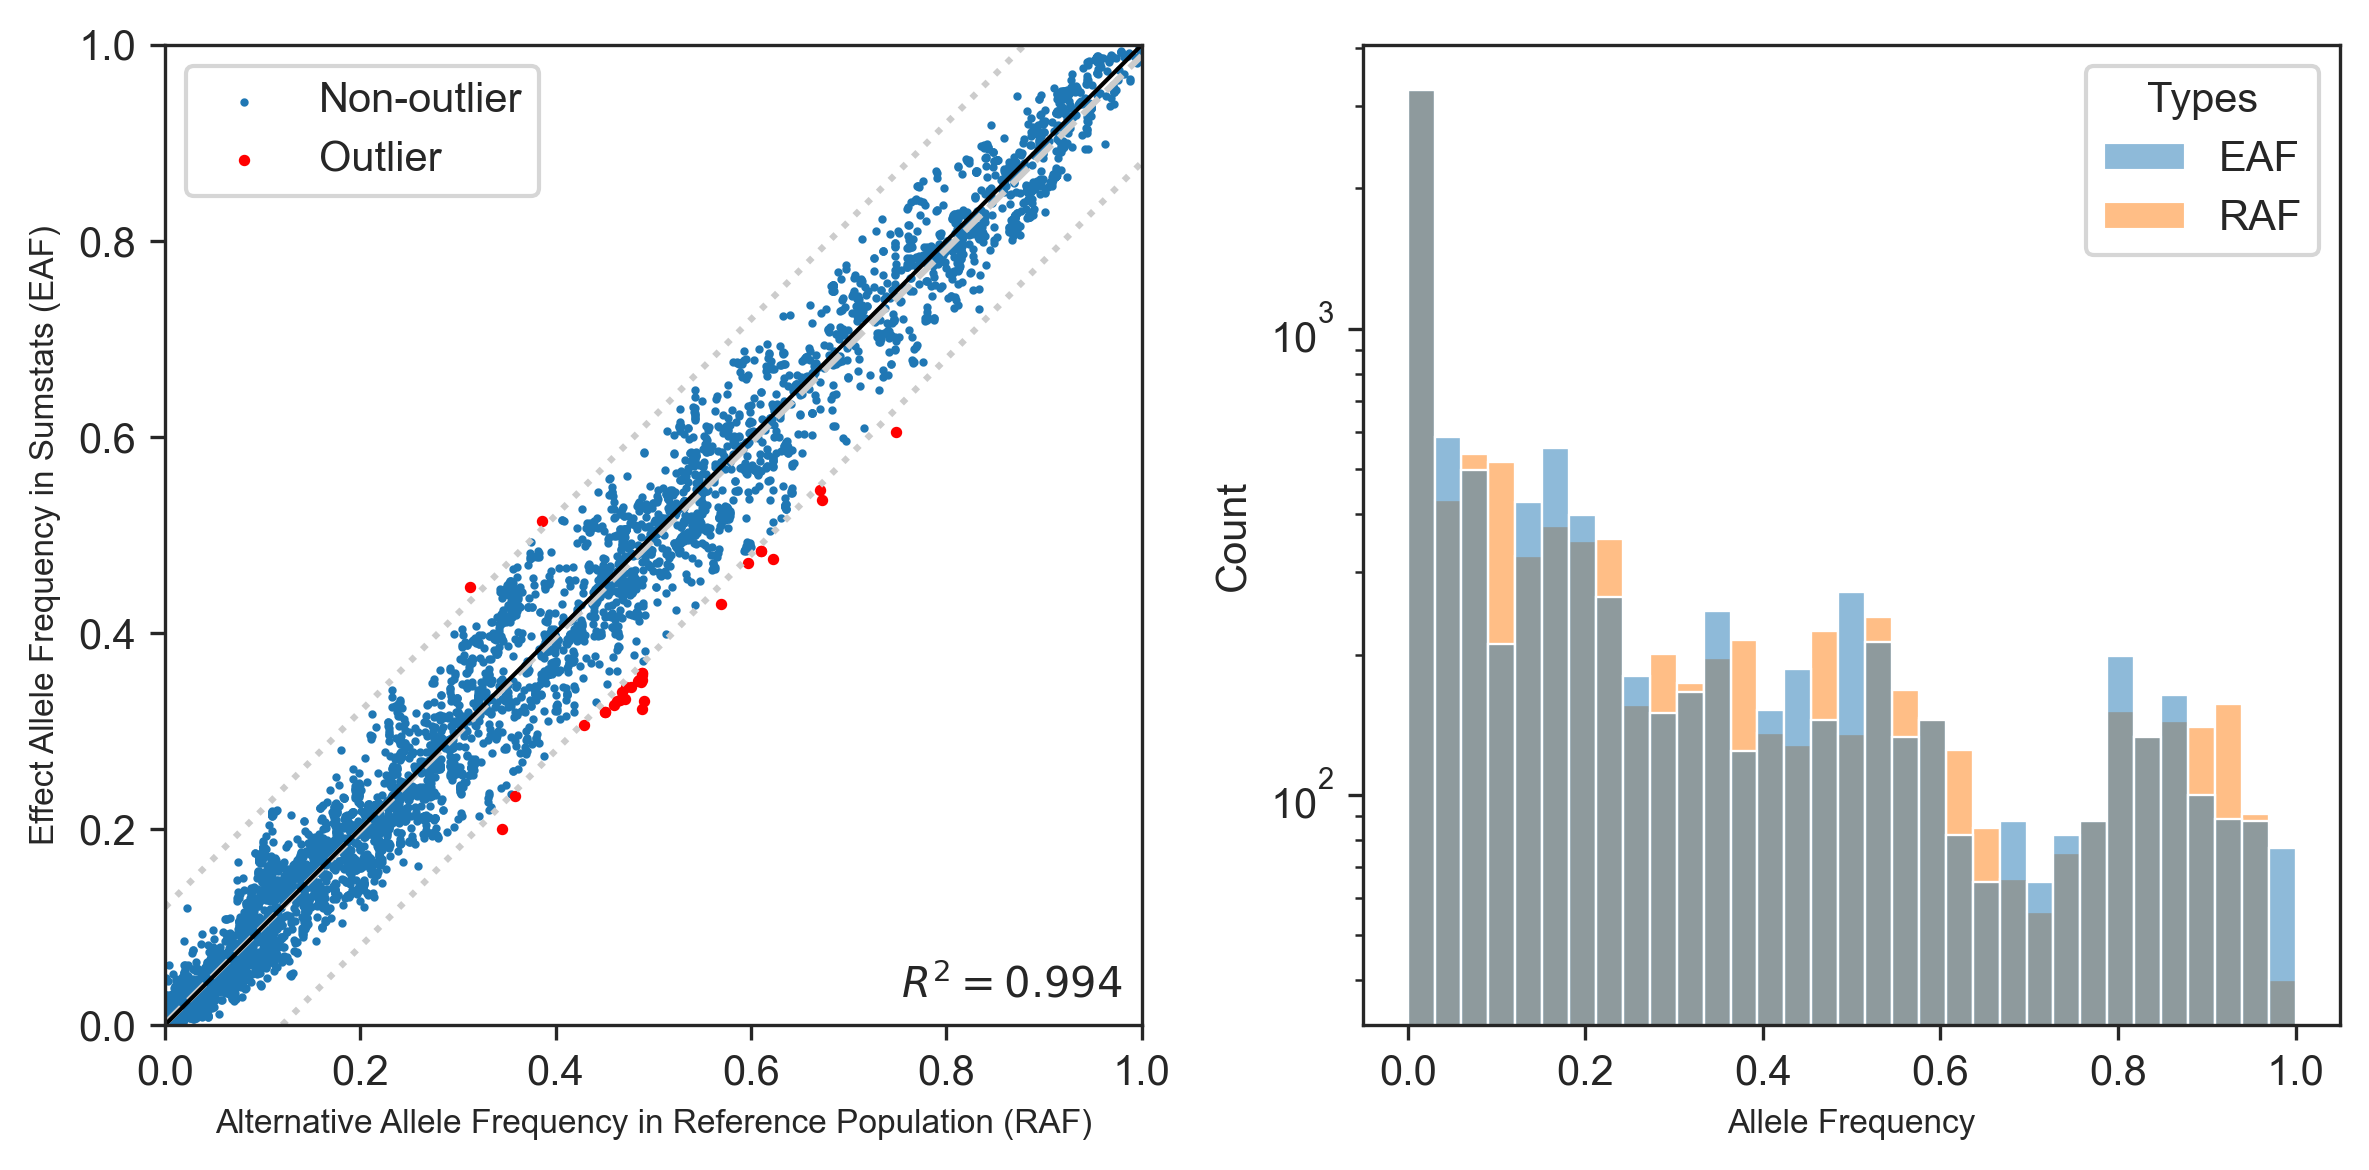

In [10]:
outliers = mysumstats.plot_daf(threshold=0.12, save="af_correlation.png",save_args={"dpi":300})

# Outlier list

In [9]:
outliers[1]

,SNPID,EAF,DAF,EA,NEA,RAF
1790,1:1232995_A_C,0.4716,-0.125622,C,A,0.597222
1792,1:1233072_C_CAT,0.4757,-0.147316,CAT,C,0.623016
1793,1:1233085_A_T,0.5462,-0.124435,T,A,0.670635
1794,1:1233086_C_T,0.5359,-0.136719,T,C,0.672619
2040,1:1301567_A_AGT,0.4291,-0.140344,AGT,A,0.569444
2044,1:1302208_A_G,0.4837,-0.126419,G,A,0.610119
2045,1:1302210_G_A,0.4837,-0.126419,A,G,0.610119
2140,1:1314474_G_T,0.6053,-0.143708,T,G,0.749008
2407,1:1429485_G_A,0.3523,-0.135795,A,G,0.488095
2411,1:1430585_G_A,0.3573,-0.130795,A,G,0.488095
